Имеется база данных риелтора с описанием сделок по продаже домов:- id - Уникальный ID для каждого дома
- date - Дата продажи дома
- price - Стоимость продажи дома
- bedrooms - Кол-во спален
- bathrooms - Кол-во ванных комнат (0.5 - туалет без душа)
- sqft_living - Кв. метры жилые
- sqft_lot - Кв. метры общие
- floors - Кол-во этажей
- waterfront - Есть набержная или нет
- view - Значение от 0 до 4 насколько хороший вид
- condition - Значение от 1 до 5 насколько хорошее состояние
- grade - Значение от 1 до 13, где 1-3 плохая конструкция здания и дизайн, 7 - средний уровень конструкции и дизайна, 11-13 - высокое качество конструкции и дизайна
- sqft_above - Кв. метры дома, которые находятся выше земли
- sqft_basement - Кв. метры дома, которые находятся ниже земли
- yr_built - Год постройки дома
- yr_renovated - Год ремонта дома
- zipcode - Индекс
- lat - Широта
- long - Долгота
- sqft_living15 - Кв. метры жилой площади у 15 соседей
- sqft_lot15 - Кв. метры общей площади у 15 соседей

Проведем первичный анализ данных.

In [2]:
import pandas as pd

df = pd.read_csv('kc_house_data.csv', encoding='windows-1251', parse_dates=['date'])
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


В анализируемых данных отсутствуют пропущенные (незаполненные) ячейки.
Средняя стоимость недвижимости составляет 5,4. Недвижимость представлена общей площадью от 290 до 13540. В основном трехкомнатная с двумя санузлами.

Найдем, в каком диапазоне изменяется стоимость недвижимости

In [5]:
df['price'].min(), df['price'].max()

(75000.0, 7700000.0)

Определим, какую долю в среднем занимает жилая площадь от всей площади по всем домам?

In [6]:
round(df['sqft_living'].mean() / df['sqft_lot'].mean() * 100, 2)

13.77

Посчитаем, сколько домов с разными этажами в данных

In [7]:
df['floors'].value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

Определим, насколько хорошее состояния у домов в базе

In [8]:
df['condition'].value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

Определим диапазон года постройки домов в базе

In [9]:
df['yr_built'].min(), df['yr_built'].max()

(1900, 2015)

Найдем, сколько в среднем стоят дома, у которых 2 спальни

In [10]:
df[df['bedrooms'] == 2]['price'].mean()

401372.681884058

Определим, какая в среднем общая площадь домов, у которых стоимость больше 600 000?

In [11]:
df[df['price'] > 600000]['sqft_lot'].mean()

20442.524776214832

Узнаем, как много домов коснулся ремонт

In [12]:
df[df['yr_renovated'] != 0].shape[0]

914

Определим, насколько в среднем стоимость домов с оценкой grade выше 10 отличается от стоимости домов с оценкой grade меньше 4

In [13]:
df[df['grade'] > 10]['price'].mean() - df[df['grade'] < 4]['price'].mean()

1488885.1175298805

Выберем дом клиенту:
Клиент хочет дом с видом на набережную, как минимум с тремя ванными и с подвалом. Определим, сколько вариантов есть у клиента

In [14]:
df[(df['waterfront'] == 1) & (df['bathrooms'] >= 3) & (df['sqft_basement'] > 0)].shape[0]

41

Выберем дом клиенту:
Клиент хочет дом либо с очень красивым видом из окна, либо с видом на набережную, в очень хорошем состоянии и год постройки не раньше 1980 года. Определим, в каком ценовом диапазоне будут дома

In [15]:
df_selection = df[((df['view'] == 4) | (df['waterfront'] == 1)) & (df['condition'] == 5) & (df['yr_built'] >= 1980)]
df_selection['price'].min(), df_selection['price'].max()

(1295000.0, 3000000.0)

Выберем дом клиенту
Клиент хочет дом без подвала, с двумя этажами, стоимостью до 150000. Определим, какая оценка по состоянию у таких домов в среднем

In [16]:
df[(df['sqft_basement'] == 0) & (df['floors'] == 2) & (df['price'] < 150000)]['condition'].mean()

2.8333333333333335

Создадим новый признак delta_renovated, который будет содержать разницу в годах между годом реновацией дома и годом постройки дома

In [17]:
df['delta_renovated'] = 0
df.loc[df['yr_renovated'] != 0, 'delta_renovated'] = df['yr_renovated'] - df['yr_built']
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,delta_renovated
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,40
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,0
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,0
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,0
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,0


Создадим признаки года продажи и месяца продажи

In [19]:
df['yr_sale'] = df['date'].apply(lambda x: x.year)
df['month_sale'] = df['date'].apply(lambda x: x.month)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,delta_renovated,yr_sale,month_sale
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,0,2014,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,40,2014,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,0,2015,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,0,2014,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,0,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,2009,0,98103,47.6993,-122.346,1530,1509,0,2014,5
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,2014,0,98146,47.5107,-122.362,1830,7200,0,2015,2
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,2009,0,98144,47.5944,-122.299,1020,2007,0,2014,6
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,2004,0,98027,47.5345,-122.069,1410,1287,0,2015,1


Удалим признаки date, zipcode, lat, long

In [20]:
df.drop(columns=['date', 'zipcode', 'lat', 'long'], inplace=True)
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,delta_renovated,yr_sale,month_sale
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650,0,2014,10
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639,40,2014,12
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062,0,2015,2
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000,0,2014,12
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503,0,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,1530,1509,0,2014,5
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,1830,7200,0,2015,2
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,1020,2007,0,2014,6
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,1410,1287,0,2015,1


Создадим датафрейм с клиентами:

In [22]:
clients = pd.DataFrame({
'client_id': [1459, 4684, 3498, 3942, 4535, 2308, 2866, 2765, 1472, 4236, 2295,
              939, 3840, 280, 20, 4332, 3475, 4213, 3113, 4809, 2134, 2242,
              2068, 4929, 1384, 1589, 3317, 2260, 1727, 1764, 1611, 1474],
'house_id': [8965450190, 6823100225, 5104540330, 2131701075, 1522700060,
            1189000207, 6821600300, 7137950720, 9510920050, 6131600255,
            5428000070, 1788800910, 8100400160, 3123049142, 6306800010,
            5083000375, 7920100025, 1951600150, 809001400, 339600110,
            1622049154, 1099600250, 8563000110, 2768100205, 3995700435,
            8861700030, 3303980210, 7731100066, 8146100580, 825069097,
            3889100029, 9524100196]
})
clients

,client_id,house_id
0,1459,8965450190
1,4684,6823100225
2,3498,5104540330
3,3942,2131701075
4,4535,1522700060
5,2308,1189000207
6,2866,6821600300
7,2765,7137950720
8,1472,9510920050
9,4236,6131600255


Присоединим к таблице clients данные по домам двумя методами, чтобы понимать какие дома покупались клиентами

In [23]:
df.set_index('id', inplace=True)
clients.set_index('house_id', inplace=True)
clients.join(df)

,client_id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,delta_renovated,yr_sale,month_sale
339600110,4809,395000.0,3,2.50,1610,3755,2.0,0,0,3,7,1610,0,1987,0,1300,3823,0,2014,9
809001400,3113,925000.0,3,1.00,1630,3200,1.5,0,0,4,8,1630,0,1912,0,1710,3600,0,2014,9
825069097,1764,770000.0,3,2.50,2650,40705,2.0,0,0,3,9,2650,0,1994,0,2550,42625,0,2014,6
1099600250,2242,260000.0,3,1.75,1710,6400,1.0,0,0,4,7,1240,470,1976,0,1600,6400,0,2014,12
1189000207,2308,387000.0,2,2.50,1170,1394,2.0,0,0,3,8,1170,0,2001,0,1250,3136,0,2014,10
1522700060,4535,518000.0,4,2.75,2520,14021,2.0,0,0,3,9,2520,0,1999,0,2330,14007,0,2014,6
1622049154,2134,289900.0,3,1.75,1899,11325,2.0,0,0,3,7,1899,0,1943,2005,2000,10454,62,2014,12
1788800910,939,190000.0,3,1.00,1200,10458,1.0,0,0,4,6,1200,0,1961,0,1160,9000,0,2014,10
1951600150,4213,180000.0,3,1.00,1610,8500,1.5,0,0,3,7,1610,0,1959,0,1070,8750,0,2015,4
2131701075,3942,420000.0,3,1.75,1720,5000,1.5,0,0,3,8,1720,0,1932,2009,1410,8300,77,2014,12


In [24]:
df.reset_index(inplace=True)
clients.reset_index(inplace=True)
clients.merge(df, left_on='house_id', right_on='id')

,house_id,client_id,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,delta_renovated,yr_sale,month_sale
0,8965450190,1459,8965450190,295000.0,3,2.50,1500,3060,2.0,0,...,7,1500,0,1994,0,2700,7734,0,2015,2
1,6823100225,4684,6823100225,700000.0,4,1.75,1870,6000,1.0,0,...,8,1670,200,1949,0,1710,6000,0,2015,4
2,5104540330,3498,5104540330,679000.0,4,2.50,3680,7236,2.0,0,...,10,3680,0,2006,0,3310,7180,0,2015,5
3,2131701075,3942,2131701075,420000.0,3,1.75,1720,5000,1.5,0,...,8,1720,0,1932,2009,1410,8300,77,2014,12
4,1522700060,4535,1522700060,518000.0,4,2.75,2520,14021,2.0,0,...,9,2520,0,1999,0,2330,14007,0,2014,6
5,1189000207,2308,1189000207,387000.0,2,2.50,1170,1394,2.0,0,...,8,1170,0,2001,0,1250,3136,0,2014,10
6,6821600300,2866,6821600300,886000.0,3,2.25,2380,6000,2.0,0,...,9,1650,730,1931,0,2000,6000,0,2015,3
7,7137950720,2765,7137950720,339100.0,4,2.50,2350,10655,2.0,0,...,8,2350,0,1992,0,2210,7028,0,2015,3
8,9510920050,1472,9510920050,725000.0,3,2.50,2980,16996,2.0,0,...,10,2980,0,1992,0,2980,15438,0,2014,9
9,6131600255,4236,6131600255,202500.0,3,2.00,1540,8316,1.0,0,...,6,1540,0,1954,0,1250,8316,0,2014,12


Найдем среднюю стоимость домов в зависимости от количества спален, отсортируем от меньшей стоимости к большей

In [25]:
df.groupby('bedrooms').agg({'price': 'mean'}).round().sort_values(by='price')

,price
bedrooms,
1,317643.0
2,401373.0
0,409504.0
3,466232.0
11,520000.0
4,635420.0
33,640000.0
5,786600.0
10,819333.0


Найдем минимальную, среднюю и максимальную стоимости домов в зависимости от состояния дома

In [26]:
df.groupby('condition').agg({'price': ['min', 'mean', 'max']})

price                          
                min           mean        max
condition                                    
1           78000.0  334431.666667  1500000.0
2           80000.0  327287.145349  2555000.0
3           75000.0  542012.578148  7062500.0
4           89000.0  521200.390033  7700000.0
5          110000.0  612418.089359  3650000.0

Построим таблицу с подсчетом количества домов в данных в зависимости от вида на набережную и оценкой вида

In [27]:
pd.crosstab(index=df['waterfront'], columns=df['view'], values=df['id'], aggfunc='count')

view,0,1,2,3,4
waterfront,,,,,
0,19489.0,331.0,955.0,491.0,184.0
1,NaN,1.0,8.0,19.0,135.0


Найдем, каких домов в зависимости от этажности и количества спален больше

In [28]:
pd.crosstab(index=df['floors'], columns=df['bedrooms'], values=df['id'], aggfunc='count', margins=True, margins_name='Total').fillna(0)

bedrooms,0,1,2,3,4,5,6,7,8,9,10,11,33,Total
floors,,,,,,,,,,,,,,
1.0,4.0,162.0,1951.0,5455.0,2383.0,605.0,104.0,9.0,5.0,0.0,1.0,0.0,1.0,10680
1.5,0.0,21.0,182.0,786.0,698.0,185.0,30.0,7.0,1.0,0.0,0.0,0.0,0.0,1910
2.0,6.0,12.0,497.0,3118.0,3682.0,775.0,119.0,19.0,6.0,4.0,2.0,1.0,0.0,8241
2.5,0.0,1.0,5.0,56.0,58.0,23.0,14.0,2.0,0.0,2.0,0.0,0.0,0.0,161
3.0,2.0,3.0,123.0,405.0,61.0,13.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,613
3.5,1.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8
Total,13.0,199.0,2760.0,9824.0,6882.0,1601.0,272.0,38.0,13.0,6.0,3.0,1.0,1.0,21613


In [29]:
df.groupby(['bedrooms', 'floors']).agg({'id': 'count'}).max()

id    5455
dtype: int64

Построим таблицу с подсчетом медианной стоимости домов в данных в зависимости от состояния дома и оценки дома

In [30]:
pd.crosstab(index=df['condition'], columns=df['grade'], values=df['price'], aggfunc='median', margins=True, margins_name='Total').fillna(0)

grade,1,3,4,5,6,7,8,9,10,11,12,13,Total
condition,,,,,,,,,,,,,
1,142000.0,0.0,150000.0,190000.0,255000.0,403500.0,932500.0,0.0,0.0,0.0,0.0,0.0,262500.0
2,0.0,280000.0,145000.0,180000.0,235000.0,305000.0,429000.0,715000.0,1752500.0,0.0,0.0,0.0,279000.0
3,0.0,75000.0,205000.0,234475.0,265000.0,357500.0,485000.0,689000.0,890000.0,1209500.0,1807500.0,2888000.0,450000.0
4,0.0,0.0,238525.0,229975.0,295000.0,390000.0,571250.0,823500.0,1030000.0,1685000.0,2125000.0,5750000.0,440000.0
5,0.0,262000.0,0.0,227450.0,285475.0,456000.0,696000.0,1078000.0,1650000.0,2050000.0,1990000.0,0.0,526000.0
Total,142000.0,262000.0,205000.0,228700.0,275276.5,375000.0,510000.0,720000.0,914327.0,1284000.0,1817500.0,2983000.0,450000.0


Посмотрим на распределение стоимости недвижимости

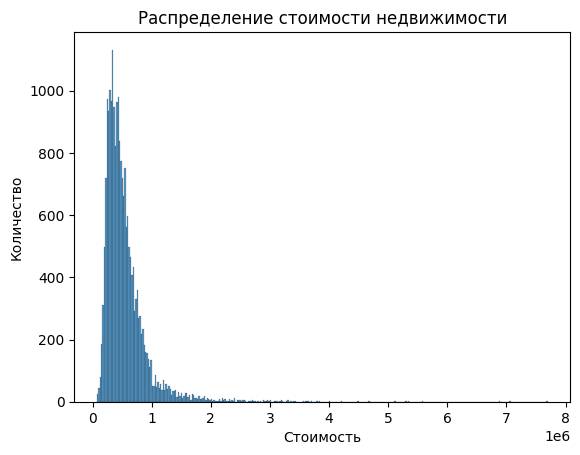

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.histplot(df['price'])
plt.title('Распределение стоимости недвижимости')
plt.xlabel('Стоимость')
plt.ylabel('Количество');

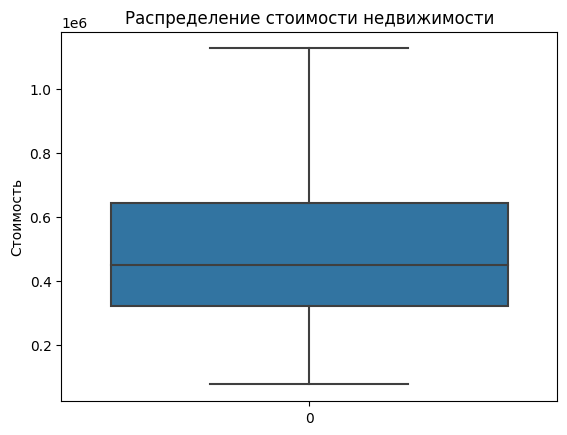

In [32]:
sns.boxplot(df['price'], showfliers=False)
plt.title('Распределение стоимости недвижимости')
plt.ylabel('Стоимость');

Разброс цен недвижимости составляет от 75 000 до 7 700 000. Стоимость подавляющего большинства домов колеблется в пределах от 320 000 до 650 000, в среднем стоимость дома составляет порядка 540 000.

Посмотрим на  распределение квадратуры жилой площади недвижимости

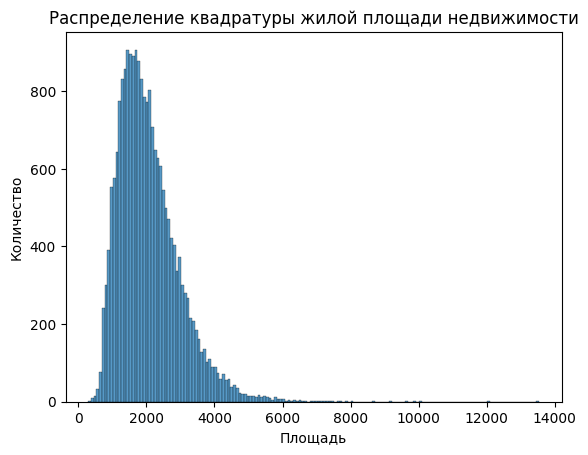

In [33]:
sns.histplot(df['sqft_living'])
plt.title('Распределение квадратуры жилой площади недвижимости')
plt.xlabel('Площадь')
plt.ylabel('Количество');

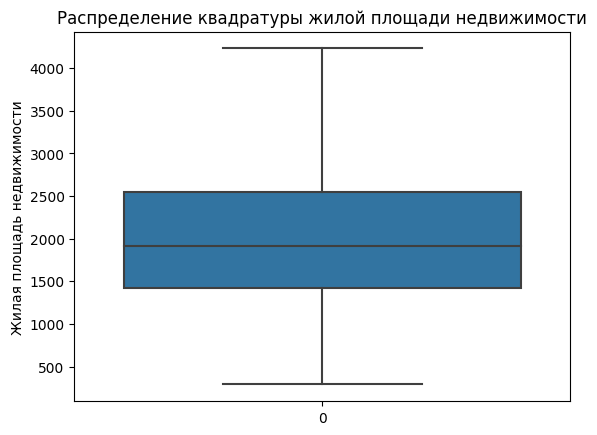

In [34]:
sns.boxplot(df['sqft_living'], showfliers=False)
plt.title('Распределение квадратуры жилой площади недвижимости')
plt.ylabel('Жилая площадь недвижимости');

Жилая площадь домов колеблется от 290 до 13 900. Подавляющее большинство домов представлены жилой площадью в пределах приблизительно от 1 500 до 2 500, средняя жилая площадь домов составляет около 2 000.

Посмотрим на распределение года постройки

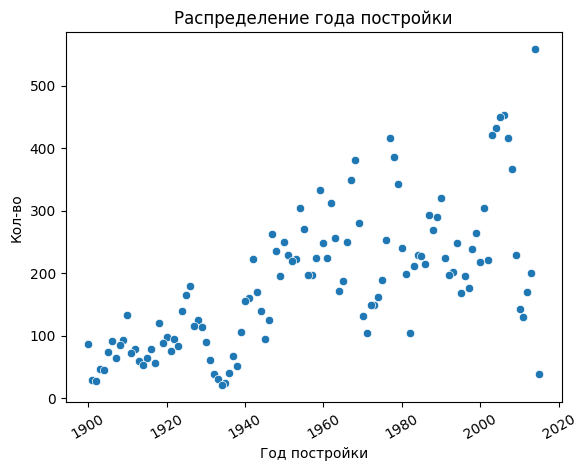

In [35]:
data = df['yr_built'].value_counts()
sns.scatterplot(x=data.index, y=data)
plt.title('Распределение года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Кол-во')
plt.xticks(rotation=30);

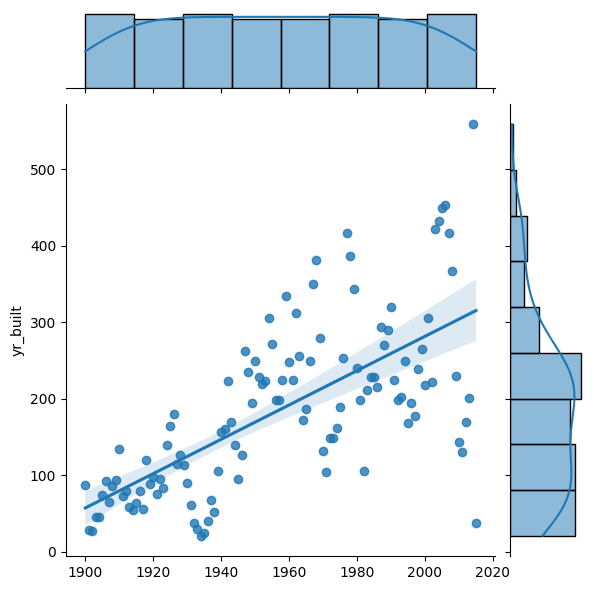

In [36]:
sns.jointplot(x=data.index, y=data, kind='reg');

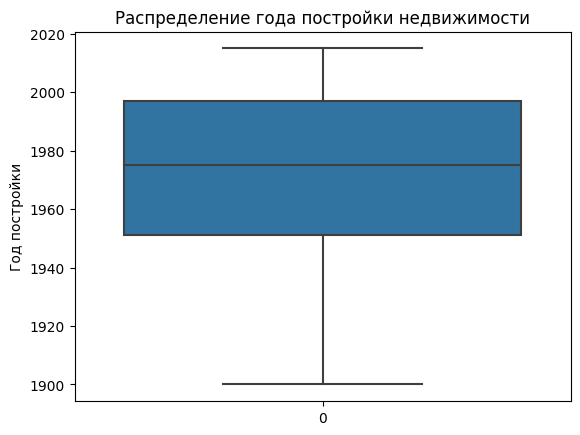

In [37]:
sns.boxplot(df['yr_built'])
plt.title('Распределение года постройки недвижимости')
plt.ylabel('Год постройки');

Прослеживается прямая линейная зависимость между годом постройки и количеством домов. Половина домов построено после 1975 года, 25% домов младше 1997 года.

Посмотрим на распределение домов в зависимости от наличия вида на набережную

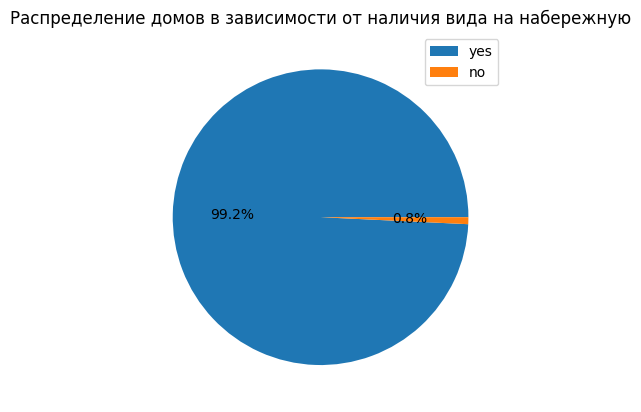

In [38]:
data = df['waterfront'].value_counts()
data.index = ['yes', 'no']
plt.pie(data, autopct='%1.1f%%')
plt.title('Распределение домов в зависимости от наличия вида на набережную')
plt.legend(data.index);

99.2% домов не имеют вида на набережную и только 0.8% домов имеют вид на набережную.

Посмотрим на распределение этажности домов

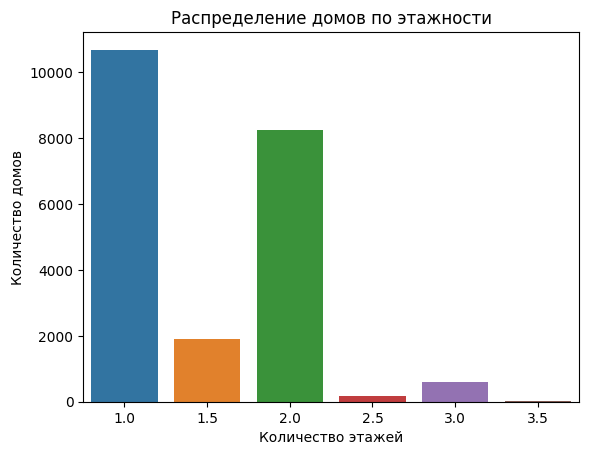

In [39]:
data = df['floors'].value_counts()
sns.barplot(x=data.index, y=data)
plt.title('Распределение домов по этажности')
plt.xlabel('Количество этажей')
plt.ylabel('Количество домов');

Подавляющее большинство домов имеют 1 или 2 этажа.

Посмотрим на распределение состояния домов

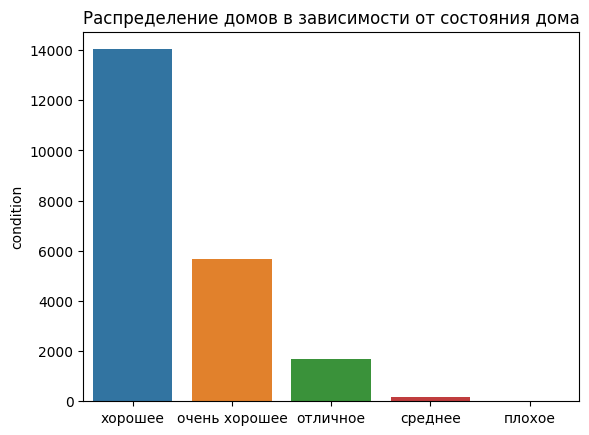

In [40]:
data = df['condition'].replace({1: 'плохое', 2: 'среднее', 3: 'хорошее', 4: 'очень хорошее', 5: 'отличное'}).value_counts()
sns.barplot(x=data.index, y=data)
plt.title('Распределение домов в зависимости от состояния дома');

Подавляющее большинство домов имеют хорошее и очень хорошее состояние.

Исследуем, какие характеристики недвижимости влияют на стоимость домов.
Для того чтобы определить, какие характеристики недвижимости влияют на ее стоимость, вначале построим матрицу корреляций.

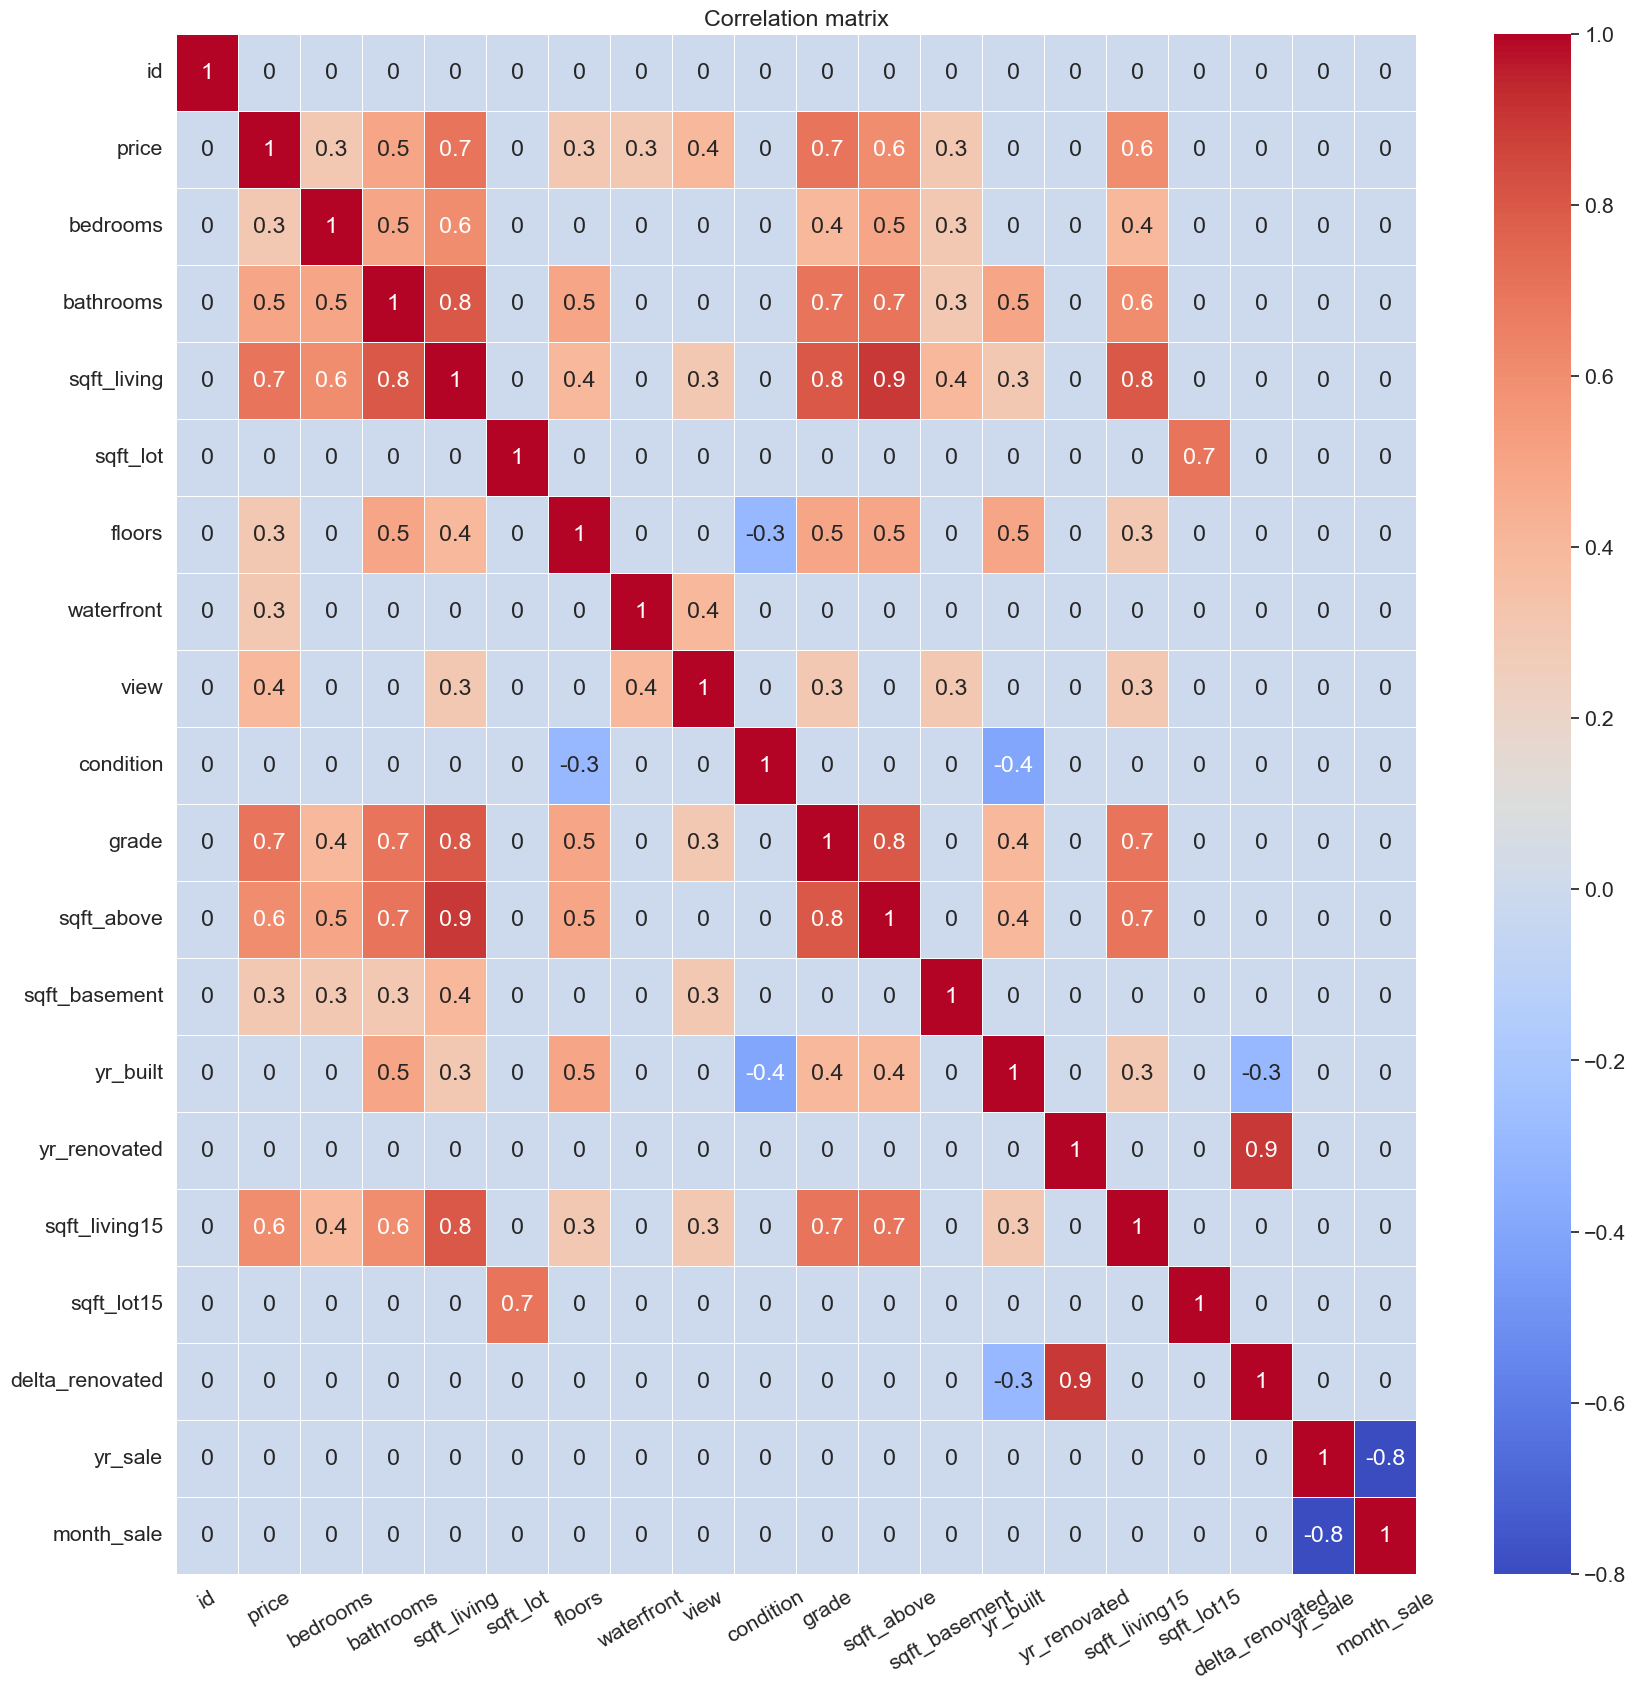

In [41]:
import numpy as np


corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
plt.figure(figsize=(20, 20))
sns.set(font_scale=1.4)
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')
plt.title('Correlation matrix')
plt.xticks(rotation=30);

In [42]:
df_corr_price = corr_matrix[(corr_matrix['price'] != 0)]['price']
df_corr_price

price            1.0
bedrooms         0.3
bathrooms        0.5
sqft_living      0.7
floors           0.3
waterfront       0.3
view             0.4
grade            0.7
sqft_above       0.6
sqft_basement    0.3
sqft_living15    0.6
Name: price, dtype: float64

Как видно из матрицы корреляций, достаточно сильная прямая линейная зависимость стоимости недвижимости с жилой площадью, что также видно на графике.

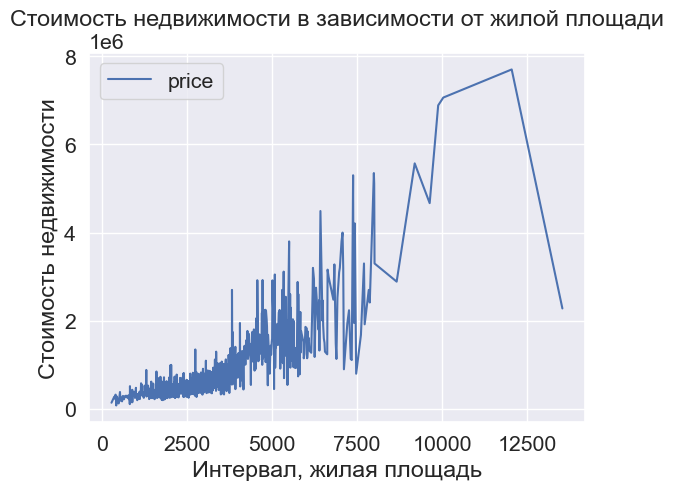

In [43]:
data = df.groupby(['sqft_living']).agg({'price': 'mean'})
sns.lineplot(data)
plt.title('Стоимость недвижимости в зависимости от жилой площади')
plt.xlabel('Интервал, жилая площадь')
plt.ylabel('Стоимость недвижимости');

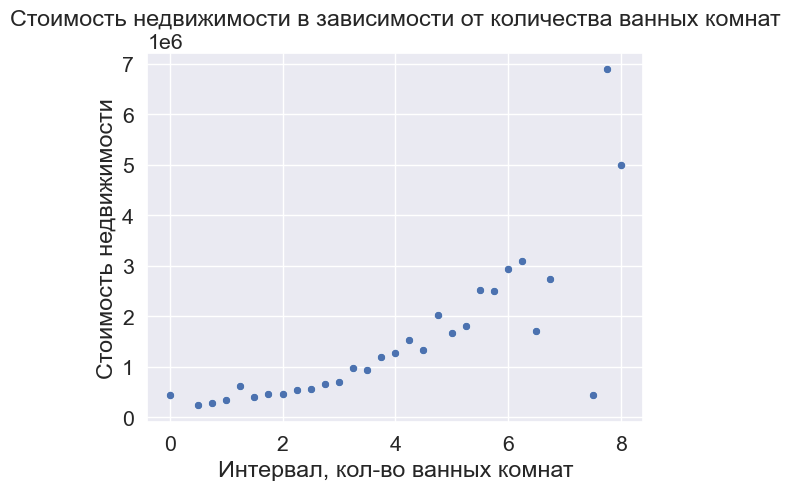

In [44]:
data = df.groupby(['bathrooms']).agg({'price': 'mean'}).reset_index()
sns.scatterplot(x=data['bathrooms'], y=data['price'])
plt.title('Стоимость недвижимости в зависимости от количества ванных комнат')
plt.xlabel('Интервал, кол-во ванных комнат')
plt.ylabel('Стоимость недвижимости');

Также, как видно из диаграммы рассеяния, чем больше в доме количество ванных комнат, тем выше его стоимость.

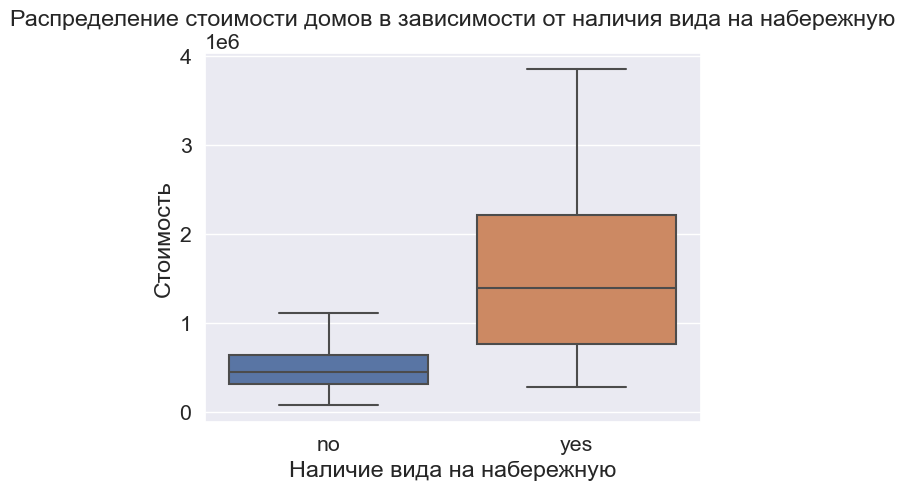

In [45]:
data = df['waterfront'].replace({0: 'no', 1: 'yes'})
sns.boxplot(x=data, y=df['price'], showfliers=False)
plt.title('Распределение стоимости домов в зависимости от наличия вида на набережную')
plt.xlabel('Наличие вида на набережную');
plt.ylabel('Стоимость');

In [46]:
df.groupby(data).agg({'price': 'mean'}).round()

,price
waterfront,
no,531564.0
yes,1661876.0


Значительное влияние на стоимость недвижимости оказывает наличие вида на набережную. Так, средняя стоимость домов с таким видом в три раза выше, чем с домами, не имеющими вид на набережную.

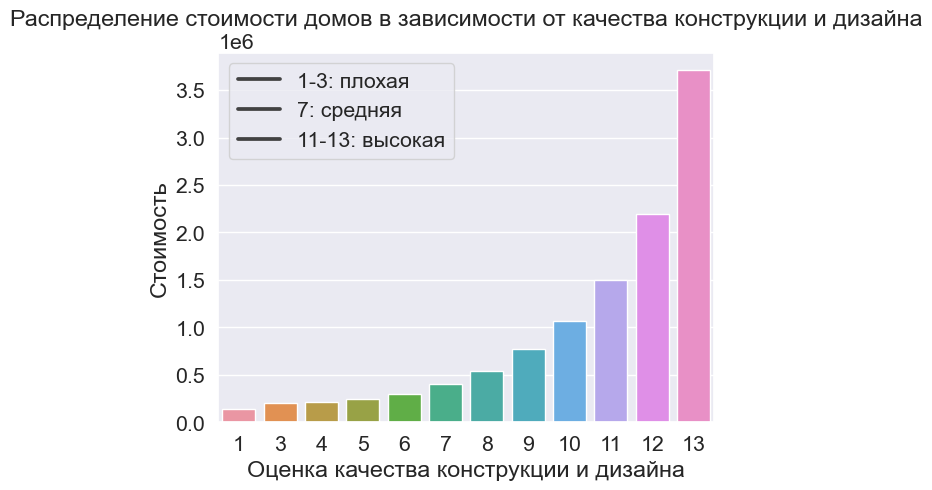

In [47]:
data = df.groupby('grade').agg({'price': 'mean'}).round()
sns.barplot(x=data.index, y=data['price'])
plt.title('Распределение стоимости домов в зависимости от качества конструкции и дизайна')
plt.xlabel('Оценка качества конструкции и дизайна');
plt.ylabel('Стоимость')
plt.legend(['1-3: плохая', '7: средняя', '11-13: высокая']);

Как видно из диаграммы, чем выше оценка качества здания и дизайна, тем выше средняя стоимость недвижимости.

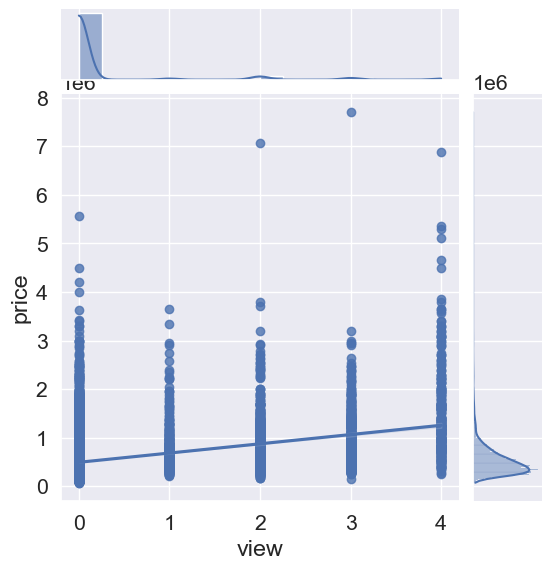

In [48]:
sns.jointplot(x=df['view'], y=df['price'], kind='reg');

Небольшая прямая линейная зависимость стоимости недвижимости наблюдается при изменении оценки вида.